In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recentDate = session.query(Measure.date).order_by(Measure.date.desc()).first()
recentDate

('2017-08-23',)

In [10]:
# with the help of educative.io, learned how to turn a string into a date value so that I can use subtraction
oneYear = dt.datetime.strptime(recentDate[0], '%Y-%m-%d') - dt.timedelta(days=366)
# using 366 just to match the scale provided in the original output and to match the summary stats
# since I'm guessing he wants both 8/23's in the dataframe

q1 = session.query(Measure.date, 
                   Measure.prcp).\
                  filter(Measure.date > oneYear).order_by(Measure.date).all()
q1DF = pd.DataFrame(q1).set_index('date')
q1DF = q1DF.sort_values(by="date")
q1DF

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


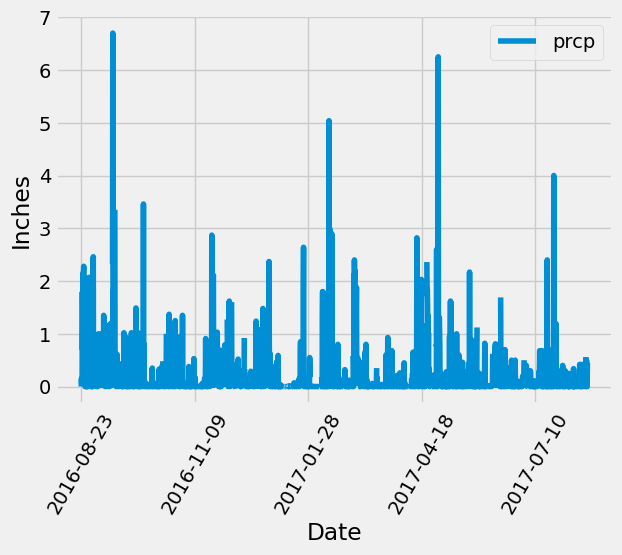

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# with the help of educative.io, learned how to turn a string into a date value so that I can use subtraction
oneYear = dt.datetime.strptime(recentDate[0], '%Y-%m-%d') - dt.timedelta(days=366)
# using 366 just to match the scale provided in the original output and to match the summary stats
# since I'm guessing he wants both 8/23's in the dataframe

# Perform a query to retrieve the data and precipitation scores
q1 = session.query(Measure.date, 
                   Measure.prcp).\
                  filter(Measure.date >= oneYear).order_by(Measure.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
q1DF = pd.DataFrame(q1).set_index('date')

# Sort the dataframe by date
q1DF = q1DF.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
q1DF.plot(rot=60)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
q1DF.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measure.station, func.count(Measure.station)).\
        group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).\
        filter(Measure.station == 'USC00519281').\
        group_by(Measure.station).all()

[(54.0, 85.0, 71.66378066378067)]

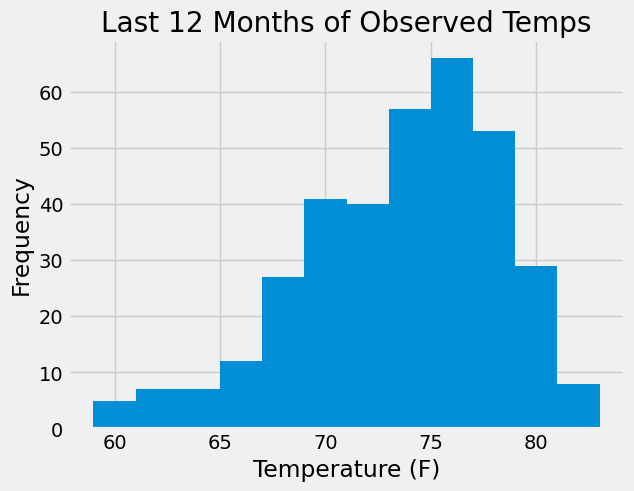

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
q2 = session.query(Measure.date, Measure.tobs).\
        filter(Measure.date >= oneYear, Measure.station == 'USC00519281').\
        group_by(Measure.date).\
        order_by(Measure.date).all()
q2DF = pd.DataFrame(q2)
plt.hist(q2DF['tobs'], bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Last 12 Months of Observed Temps")
plt.show()

# Close Session

In [17]:
session.close()